# FINAL PROJECT - CMSE492

The aim and motivation of this project is to do the following:
- Classify users into good or bad financial positions based on relevant variables in data
- Predict whether a user is making good financial decisions
- Predict (if possible) change in financial metrics like expenses or savings so a specific user can achieve financial stability 


## Exploratory Data Analysis and Data Preparation

In [128]:
#Library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [129]:
df = pd.read_csv('data.csv')
df

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,...,6200.537192,11265.627707,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517
1,26858.596592,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,...,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606
2,50367.605084,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,...,7050.360422,13891.450624,1466.073984,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422
3,101455.600247,21,0,Self_Employed,Tier_3,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,...,16694.965136,31617.953615,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183
4,24875.283548,52,4,Professional,Tier_2,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,...,1874.099434,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,40913.466178,51,4,Self_Employed,Tier_1,12274.039853,7703.854895,1646.799940,5477.403246,2084.230191,...,1163.318310,1163.318310,597.028412,287.315050,347.658355,145.843671,212.833325,44.900294,98.765527,190.591917
19996,90295.772638,21,1,Student,Tier_2,18059.154528,0.000000,2770.589626,13118.222419,4633.108332,...,10613.589598,30725.175170,3854.823822,359.602765,911.269461,424.064224,1555.548024,129.655981,239.445622,351.436046
19997,40604.567373,30,1,Professional,Tier_2,8120.913475,8089.612716,1548.564328,6018.276121,2493.563674,...,2267.905134,2267.905134,1385.511100,379.927216,138.209465,297.695658,824.565267,57.891000,72.728663,122.569277
19998,118157.817240,27,2,Professional,Tier_1,35447.345172,12345.910538,4735.672471,16392.438426,8248.242279,...,10603.684814,10603.684814,3217.771594,2265.865033,726.247719,273.912367,859.230004,98.961780,92.189012,569.811212


We bunch all expenses into one columns and drop specific columns for different kids of expenses. We will also drop non-useful columns

In [130]:
df["Expenses"] = df["Rent"] + df["Loan_Repayment"] +  df["Insurance"] + df["Groceries"] + df["Transport"] + df["Eating_Out"] + df["Entertainment"] + df["Utilities"] + df["Healthcare"] + df["Education"] + df["Miscellaneous"]

In [131]:
df.drop(df.columns[5:16],axis=1,inplace=True)
df

,Income,Age,Dependents,Occupation,City_Tier,Desired_Savings_Percentage,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous,Expenses
0,44637.249636,49,0,Self_Employed,Tier_1,13.890948,6200.537192,11265.627707,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517,33371.621929
1,26858.596592,34,2,Retired,Tier_2,7.160376,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606,17181.777859
2,50367.605084,35,1,Student,Tier_3,13.997808,7050.360422,13891.450624,1466.073984,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422,36476.154459
3,101455.600247,21,0,Self_Employed,Tier_3,16.455440,16694.965136,31617.953615,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183,69837.646632
4,24875.283548,52,4,Professional,Tier_2,7.533982,1874.099434,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076,18609.583016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,40913.466178,51,4,Self_Employed,Tier_1,12.353542,1163.318310,1163.318310,597.028412,287.315050,347.658355,145.843671,212.833325,44.900294,98.765527,190.591917,39750.147868
19996,90295.772638,21,1,Student,Tier_2,11.754249,10613.589598,30725.175170,3854.823822,359.602765,911.269461,424.064224,1555.548024,129.655981,239.445622,351.436046,59570.597468
19997,40604.567373,30,1,Professional,Tier_2,13.854837,2267.905134,2267.905134,1385.511100,379.927216,138.209465,297.695658,824.565267,57.891000,72.728663,122.569277,38336.662239
19998,118157.817240,27,2,Professional,Tier_1,17.436659,10603.684814,10603.684814,3217.771594,2265.865033,726.247719,273.912367,859.230004,98.961780,92.189012,569.811212,107554.132426


In [132]:
df.drop(df.columns[8:16],axis=1,inplace=True)
df

,Income,Age,Dependents,Occupation,City_Tier,Desired_Savings_Percentage,Desired_Savings,Disposable_Income,Expenses
0,44637.249636,49,0,Self_Employed,Tier_1,13.890948,6200.537192,11265.627707,33371.621929
1,26858.596592,34,2,Retired,Tier_2,7.160376,1923.176434,9676.818733,17181.777859
2,50367.605084,35,1,Student,Tier_3,13.997808,7050.360422,13891.450624,36476.154459
3,101455.600247,21,0,Self_Employed,Tier_3,16.455440,16694.965136,31617.953615,69837.646632
4,24875.283548,52,4,Professional,Tier_2,7.533982,1874.099434,6265.700532,18609.583016
...,...,...,...,...,...,...,...,...,...
19995,40913.466178,51,4,Self_Employed,Tier_1,12.353542,1163.318310,1163.318310,39750.147868
19996,90295.772638,21,1,Student,Tier_2,11.754249,10613.589598,30725.175170,59570.597468
19997,40604.567373,30,1,Professional,Tier_2,13.854837,2267.905134,2267.905134,38336.662239
19998,118157.817240,27,2,Professional,Tier_1,17.436659,10603.684814,10603.684814,107554.132426


#### Feature engineering: we curate more variables which may be useful in our data analysis

SavingsRate: Measures how much a user desires to save relative to their income.

    Formula: Desired_Savings / Income

ExpenseRatio: Indicates how much of their income is being spent.

    Formula: Expenses / Income

NetSavings: Calculates the remaining amount after expenses and desired savings.

    Formula: Income - Expenses - Desired_Savings

In [133]:
# Savings Rate: Desired Savings as a percentage of Income
df['SavingsRate'] = df['Desired_Savings'] / (df['Income'])

# Expense Ratio: Expenses as a percentage of Income
df['ExpenseRatio'] = df['Expenses'] / (df['Income'])

# Net Savings: Income minus Expenses and Desired Savings
df['NetSavings'] = df['Income'] - df['Expenses'] - df['Desired_Savings']

# Display the first few rows to verify
df.head()

,Income,Age,Dependents,Occupation,City_Tier,Desired_Savings_Percentage,Desired_Savings,Disposable_Income,Expenses,SavingsRate,ExpenseRatio,NetSavings
0,44637.249636,49,0,Self_Employed,Tier_1,13.890948,6200.537192,11265.627707,33371.621929,0.138909,0.747618,5065.090514
1,26858.596592,34,2,Retired,Tier_2,7.160376,1923.176434,9676.818733,17181.777859,0.071604,0.639712,7753.642299
2,50367.605084,35,1,Student,Tier_3,13.997808,7050.360422,13891.450624,36476.154459,0.139978,0.724199,6841.090203
3,101455.600247,21,0,Self_Employed,Tier_3,16.455440,16694.965136,31617.953615,69837.646632,0.164554,0.688357,14922.988478
4,24875.283548,52,4,Professional,Tier_2,7.533982,1874.099434,6265.700532,18609.583016,0.075340,0.748115,4391.601098


### EDA graphs

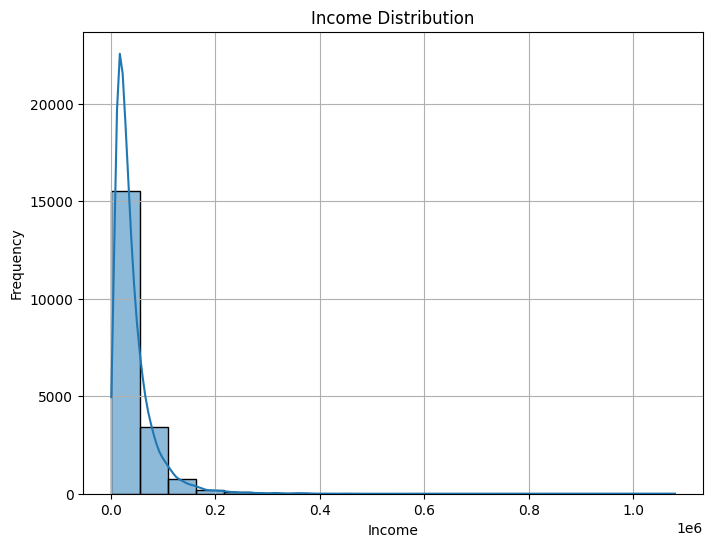

In [134]:
# Income distribution in the data is left-skewed
plt.figure(figsize=(8, 6))
sns.histplot(df['Income'], bins=20, kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

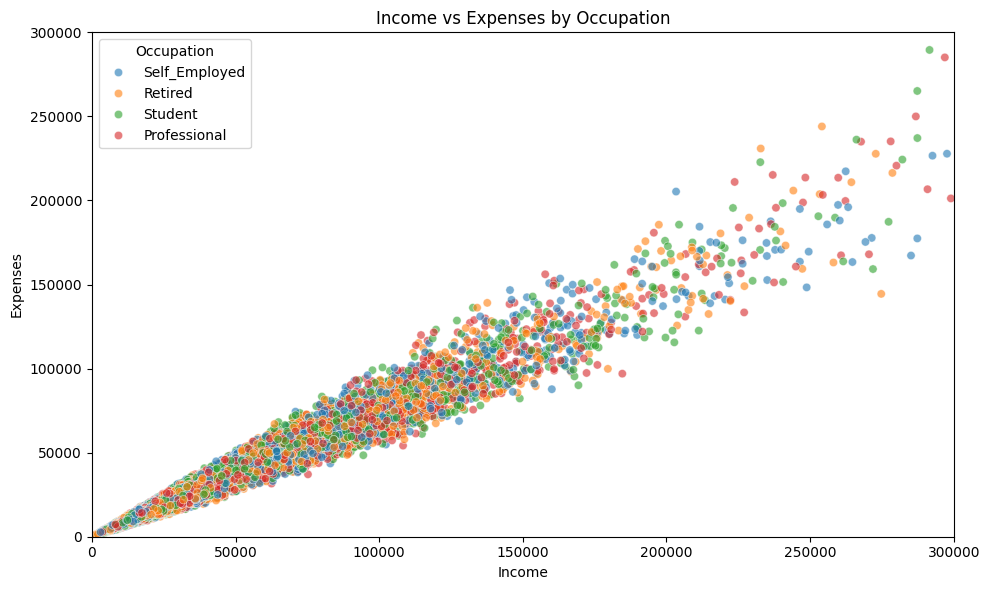

In [135]:
# Scatter plot for Income vs Expenses colored by Occupation
plt.figure(figsize=(10, 6))
plt.xlim(0, 300000)  # Adjust the range based on your data
plt.ylim(0, 300000)  # Adjust the range based on your data
sns.scatterplot(data=df, x='Income', y='Expenses', hue='Occupation', alpha=0.6)
plt.title('Income vs Expenses by Occupation')
plt.tight_layout()
plt.show()

#### LabelEncoder changes columns Occupation and CityTier from categorical to numerical variables.

In [136]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Store encoder for inverse transformation if needed
df

,Income,Age,Dependents,Occupation,City_Tier,Desired_Savings_Percentage,Desired_Savings,Disposable_Income,Expenses,SavingsRate,ExpenseRatio,NetSavings
0,44637.249636,49,0,2,0,13.890948,6200.537192,11265.627707,33371.621929,0.138909,0.747618,5065.090514
1,26858.596592,34,2,1,1,7.160376,1923.176434,9676.818733,17181.777859,0.071604,0.639712,7753.642299
2,50367.605084,35,1,3,2,13.997808,7050.360422,13891.450624,36476.154459,0.139978,0.724199,6841.090203
3,101455.600247,21,0,2,2,16.455440,16694.965136,31617.953615,69837.646632,0.164554,0.688357,14922.988478
4,24875.283548,52,4,0,1,7.533982,1874.099434,6265.700532,18609.583016,0.075340,0.748115,4391.601098
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,40913.466178,51,4,2,0,12.353542,1163.318310,1163.318310,39750.147868,0.028434,0.971566,0.000000
19996,90295.772638,21,1,3,1,11.754249,10613.589598,30725.175170,59570.597468,0.117542,0.659727,20111.585573
19997,40604.567373,30,1,0,1,13.854837,2267.905134,2267.905134,38336.662239,0.055853,0.944147,0.000000
19998,118157.817240,27,2,0,0,17.436659,10603.684814,10603.684814,107554.132426,0.089742,0.910258,0.000000


#### GOOD vs BAD financial standing

Setting the threshold for person to be in good financial standing to have a savings rate of higher than 12% and their NetSavings to be non-negative.

In [137]:
# Define thresholds for classification
df['Financial_Status'] = ((df['SavingsRate'] > 0.12) & (df['NetSavings'] > 0)).astype(int)

# Check the distribution of Financial_Status
print(df['Financial_Status'].value_counts())


Financial_Status
0    15845
1     4155
Name: count, dtype: int64


#### Correlation Heatmap

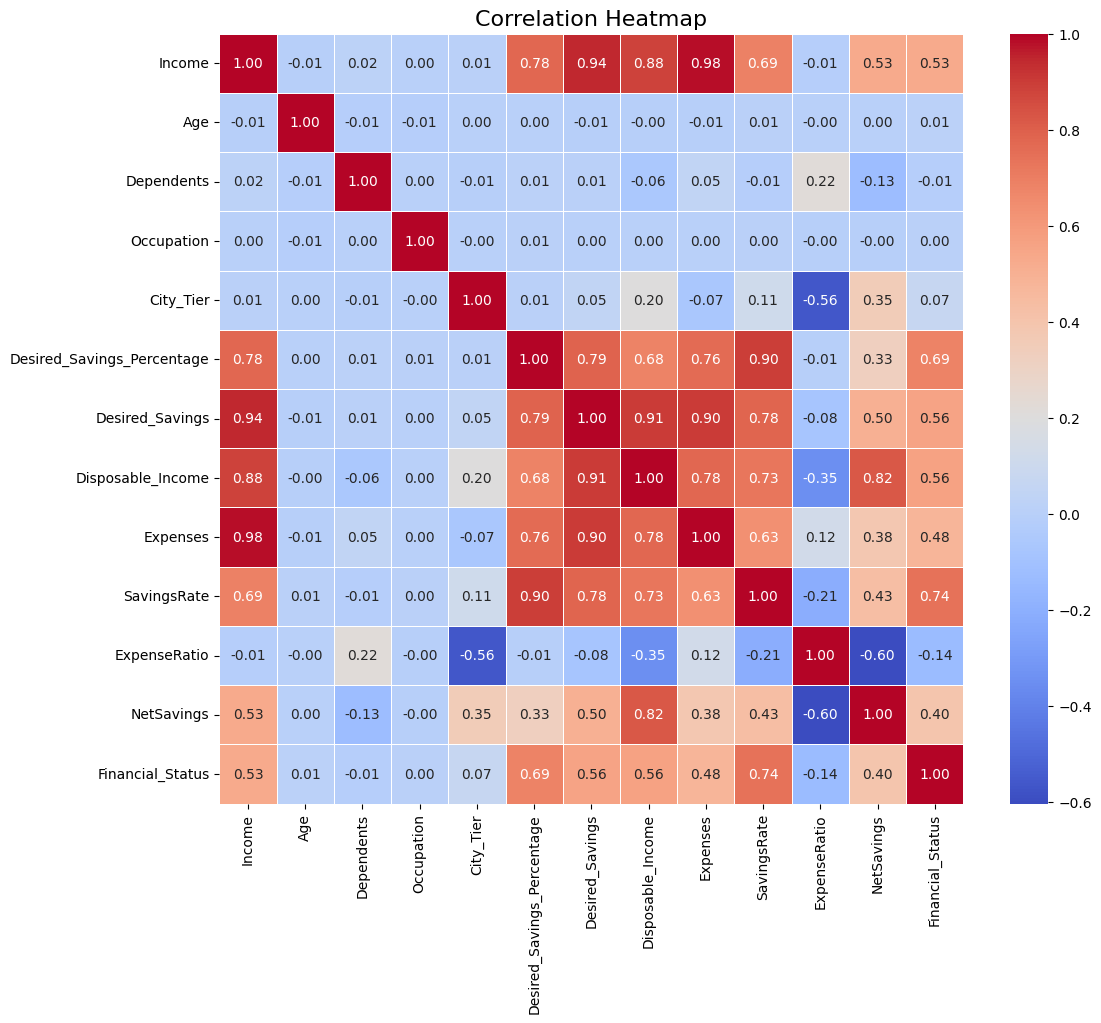

Top correlated features with Financial Status:
Financial_Status              1.000000
SavingsRate                   0.740678
Desired_Savings_Percentage    0.686720
Disposable_Income             0.562436
Desired_Savings               0.559125
Income                        0.526528
Expenses                      0.479329
NetSavings                    0.395829
ExpenseRatio                  0.135885
City_Tier                     0.070485
Dependents                    0.010796
Age                           0.010468
Occupation                    0.004671
Name: Financial_Status, dtype: float64


In [138]:
correlation_matrix = df.corr()

# Plot heatmap for correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

# Get the absolute correlations of the target variable
target_correlation = correlation_matrix["Financial_Status"].abs().sort_values(ascending=False)
print("Top correlated features with Financial Status:")
print(target_correlation)

## Supervised learning

#### I. Random Forest Classifier

In [139]:
# Features (exclude 'Financial_Status') and target
X = df.drop(['Financial_Status'], axis=1)
y = df['Financial_Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Random Forest Classifier Results:
Accuracy: 0.99575
Confusion Matrix:
 [[3205    4]
 [  13  778]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3209
           1       0.99      0.98      0.99       791

    accuracy                           1.00      4000
   macro avg       1.00      0.99      0.99      4000
weighted avg       1.00      1.00      1.00      4000



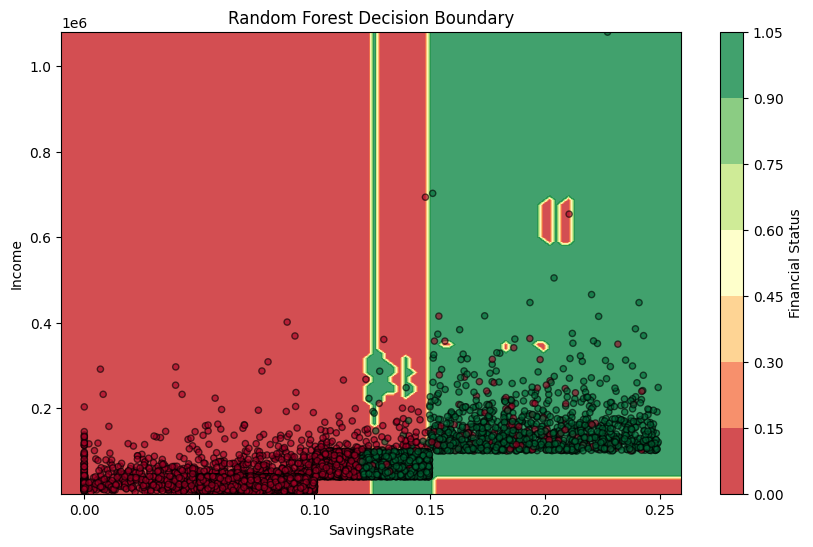

In [140]:
# Step 1: Select only the two features for visualization
X_vis = X[['SavingsRate', 'Income']].values
y_vis = y.values

# Step 2: Train a new Random Forest model on these two features
rf_vis_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
rf_vis_model.fit(X_vis, y_vis)

# Step 3: Create a mesh grid for visualization
x_min, x_max = X_vis[:, 0].min() - 0.01, X_vis[:, 0].max() + 0.01  # Adjust as needed
y_min, y_max = X_vis[:, 1].min() - 1000, X_vis[:, 1].max() + 1000  # Adjust as needed
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Step 4: Predict on the grid
Z = rf_vis_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Step 5: Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap="RdYlGn")
plt.colorbar(label="Financial Status")
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, edgecolors="k", cmap="RdYlGn", alpha=0.6, s=20)
plt.title("Random Forest Decision Boundary")
plt.xlabel("SavingsRate")
plt.ylabel("Income")
plt.show()


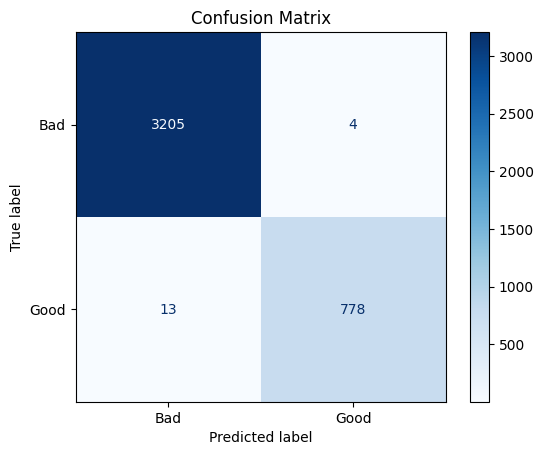

In [141]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Bad", "Good"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()


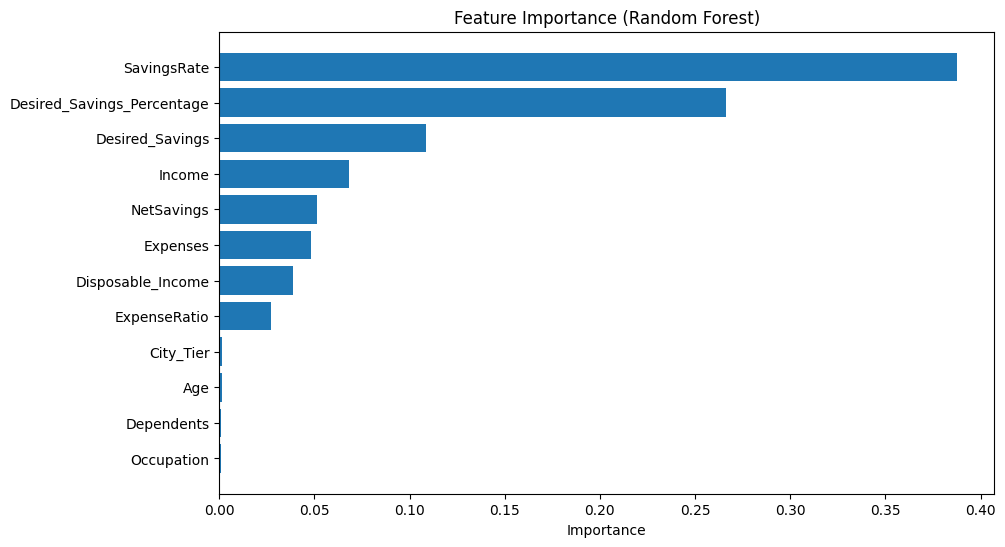

In [142]:
# Feature importance
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.gca().invert_yaxis()
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.show()


#### II. Logistic Regression

/mnt/ufs18/rs/CMSE_492_FS24_S001/envs/ml/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


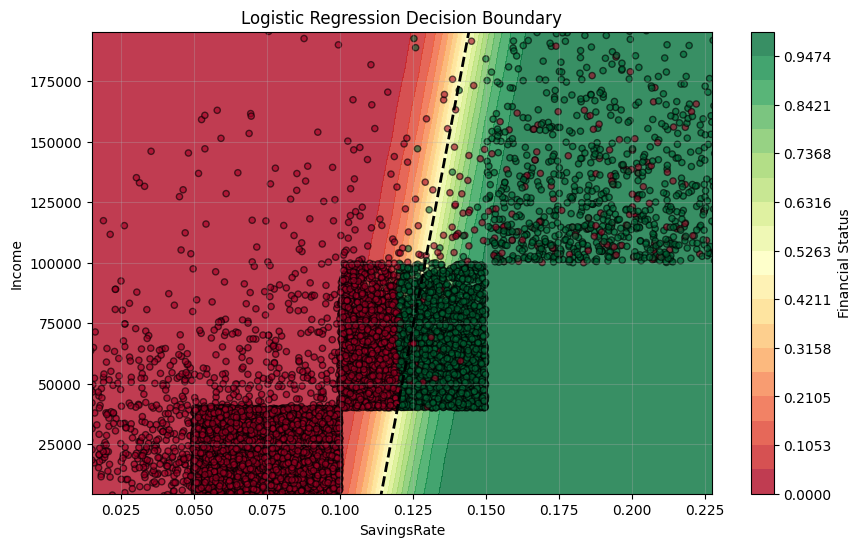

In [143]:
# Step 1: Select Features and Target
X = df[['SavingsRate', 'Income']] 
y = df['Financial_Status']  # Binary target: Good (1), Bad (0)

# Step 2: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Scale the Data for Training
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Step 5: Create a Mesh Grid Using Original Data Range
x_min, x_max = X['SavingsRate'].min() - 0.1, X['SavingsRate'].max() + 0.1
y_min, y_max = X['Income'].min() - 1000, X['Income'].max() + 1000
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Step 6: Predict on the Grid (Transforming to Scaled Space for the Model)
grid = np.c_[xx.ravel(), yy.ravel()]
grid_scaled = scaler.transform(grid)  # Scale the grid
Z = log_reg.predict_proba(grid_scaled)[:, 1]  # Predict probabilities
Z = Z.reshape(xx.shape)

# Step 7: Plot Decision Boundary with Non-Scaled Axes
plt.figure(figsize=(10, 6))

# Adjust limits to zoom in on the data (focus on the interquartile range)
plt.xlim(X['SavingsRate'].quantile(0.01), X['SavingsRate'].quantile(0.99))
plt.ylim(X['Income'].quantile(0.01), X['Income'].quantile(0.99))

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap="RdYlGn", levels=np.linspace(0, 1, 20))
plt.colorbar(label="Financial Status")

# Highlight the main decision boundary (0.5 probability)
plt.contour(xx, yy, Z, levels=[0.5], colors="black", linestyles="--", linewidths=2)

# Scatter the original data points with reduced clutter
plt.scatter(
    X['SavingsRate'], 
    X['Income'], 
    c=y, 
    edgecolors="k", 
    cmap="RdYlGn", 
    alpha=0.6,  # Transparency to reduce clutter
    s=20        # Reduce marker size
)

# Add labels, title, legend, and grid
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("SavingsRate")
plt.ylabel("Income")
plt.grid(alpha=0.3)  # Add grid lines with transparency
plt.show()

Accuracy Score: 0.9715

Confusion Matrix:
[[3159   50]
 [  64  727]]


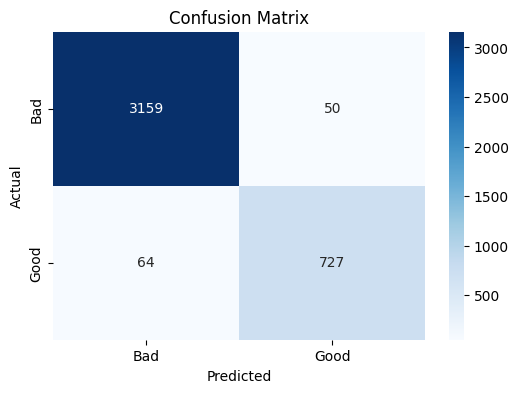


Classification Report:
              precision    recall  f1-score   support

         Bad       0.98      0.98      0.98      3209
        Good       0.94      0.92      0.93       791

    accuracy                           0.97      4000
   macro avg       0.96      0.95      0.95      4000
weighted avg       0.97      0.97      0.97      4000



In [144]:
# Predict the classes on the test set
y_pred = log_reg.predict(X_test_scaled)

# 1. Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualize the Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Bad", "Good"], yticklabels=["Bad", "Good"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 3. Classification Report
report = classification_report(y_test, y_pred, target_names=["Bad", "Good"])
print("\nClassification Report:")
print(report)


## ANN
Predicting Net Savings

In [145]:
data = df

# Use all variables except 'NetSavings' as features
X = data.drop(columns=['NetSavings'])  # Drop the target column
y = data['NetSavings']  # Target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the regression-specific ANN
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Linear activation for regression output
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

# Evaluate the model
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")


Epoch 1/50


/mnt/ufs18/rs/CMSE_492_FS24_S001/envs/ml/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 66068256.0000 - mae: 5762.8740 - val_loss: 46883872.0000 - val_mae: 4528.7739
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - loss: 39977432.0000 - mae: 4106.7837 - val_loss: 27341306.0000 - val_mae: 3758.1069
Epoch 3/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - loss: 27286776.0000 - mae: 3641.8005 - val_loss: 24867618.0000 - val_mae: 3630.2256
Epoch 4/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - loss: 23884960.0000 - mae: 3428.1694 - val_loss: 22760072.0000 - val_mae: 3447.8796
Epoch 5/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - loss: 23943624.0000 - mae: 3361.4055 - val_loss: 20864186.0000 - val_mae: 3255.6047
Epoch 6/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - loss: 21268138.0000 - mae: 3184.0684 - val_loss: 19392570.0000 - val_mae: 3107.4797
Epoch 7/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - loss: 19066940.0000 - mae: 2996.6406 - val_loss: 18300250.0000 - val_mae: 2965.1001
Epoch 8/50
400/400 ━━━━━━━━━━━━━━

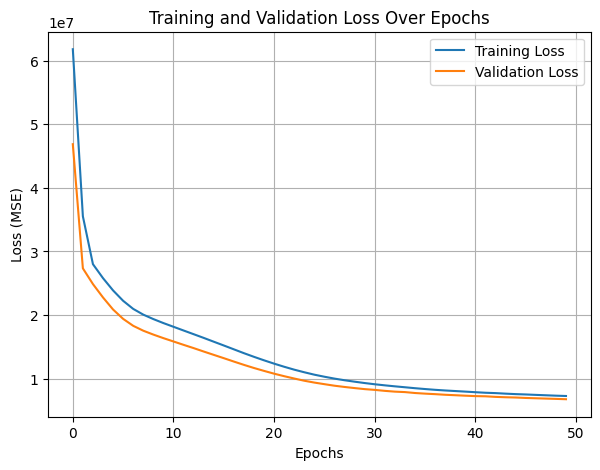

In [150]:
# Plot training and validation loss over epochs
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid()
plt.show()


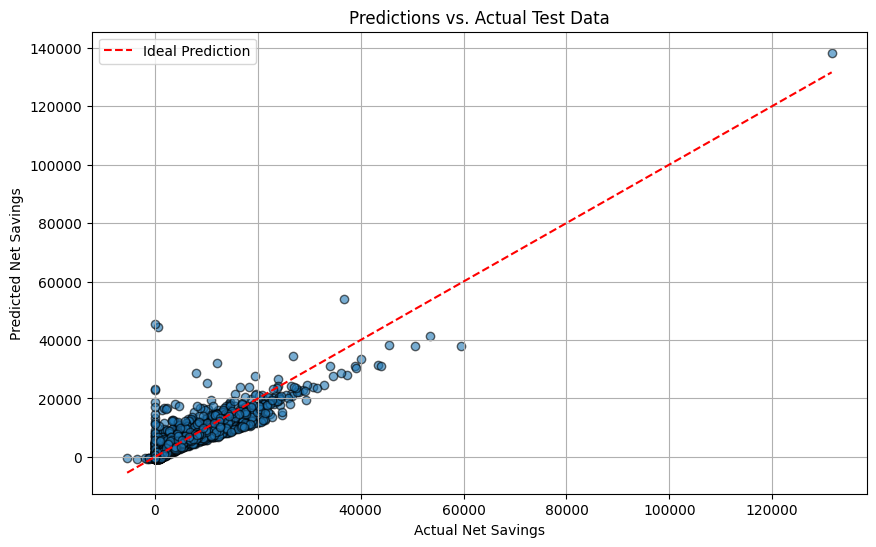

In [147]:
# Scatter plot of predictions versus actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Prediction')
plt.title('Predictions vs. Actual Test Data')
plt.xlabel('Actual Net Savings')
plt.ylabel('Predicted Net Savings')
plt.legend()
plt.grid()
plt.show()


In [148]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold = 1
cv_scores = []

for train_idx, val_idx in kf.split(X):
    X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
    y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]
    
    # Normalize the features
    X_scaler = MinMaxScaler()
    X_train_fold = X_scaler.fit_transform(X_train_fold)
    X_val_fold = X_scaler.transform(X_val_fold)
    
    # Build the model
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train_fold.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    
    # Train the model
    model.fit(X_train_fold, y_train_fold, validation_data=(X_val_fold, y_val_fold), 
              epochs=50, batch_size=32, verbose=0)
    
    # Evaluate on the validation fold
    y_val_pred = model.predict(X_val_fold)
    rmse_fold = np.sqrt(mean_squared_error(y_val_fold, y_val_pred))
    cv_scores.append(rmse_fold)
    
    print(f"Fold {fold} RMSE: {rmse_fold:.4f}")
    fold += 1

# Calculate and print the average RMSE
mean_rmse = np.mean(cv_scores)
print(f"Average RMSE across folds: {mean_rmse:.4f}")


/mnt/ufs18/rs/CMSE_492_FS24_S001/envs/ml/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step
Fold 1 RMSE: 2606.3304


/mnt/ufs18/rs/CMSE_492_FS24_S001/envs/ml/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step
Fold 2 RMSE: 2514.1296


/mnt/ufs18/rs/CMSE_492_FS24_S001/envs/ml/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Fold 3 RMSE: 2668.1815


/mnt/ufs18/rs/CMSE_492_FS24_S001/envs/ml/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step
Fold 4 RMSE: 2603.2548


/mnt/ufs18/rs/CMSE_492_FS24_S001/envs/ml/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step
Fold 5 RMSE: 2590.3134
Average RMSE across folds: 2596.4419


## Unsupervised Learning using k-Means

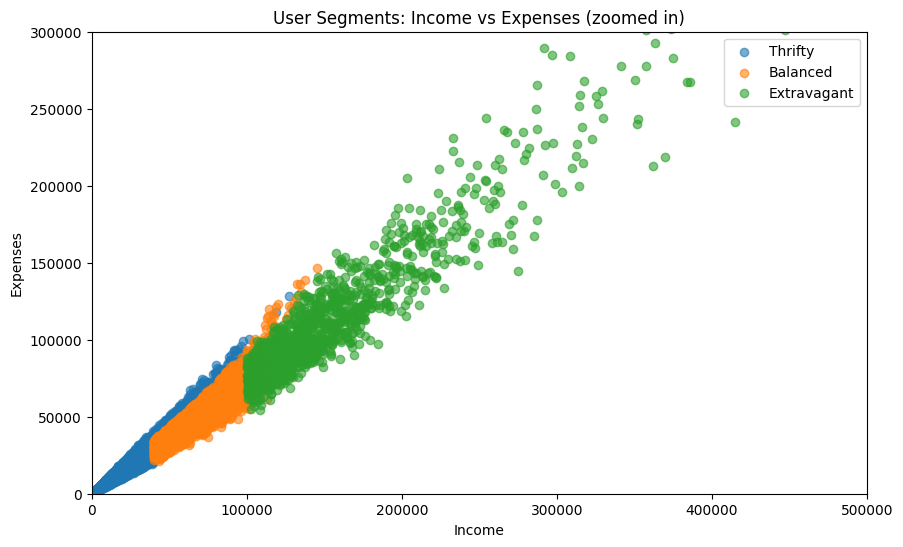

In [149]:
# Select relevant columns
financial_data = df[['Income', 'Expenses', 'SavingsRate', 'Desired_Savings_Percentage', 'NetSavings', 'Financial_Status']]

# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(financial_data)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(normalized_data)

# Map cluster labels to segments
cluster_labels = {
    0: 'Thrifty',
    1: 'Balanced',
    2: 'Extravagant'
}
df['Segment'] = df['Cluster'].map(cluster_labels)

# Visualization: Scatter plot for Income vs Expenses
plt.figure(figsize=(10, 6))
for segment, color in zip(['Thrifty', 'Balanced', 'Extravagant'], ['blue', 'green', 'red']):
    cluster_data = df[df['Segment'] == segment]
    plt.scatter(cluster_data['Income'], cluster_data['Expenses'], label=segment, alpha=0.6)

plt.xlim(0, 500000)  # Adjust the range based on your data
plt.ylim(0, 300000)  # Adjust the range based on your data
plt.title('User Segments: Income vs Expenses (zoomed in)')
plt.xlabel('Income')
plt.ylabel('Expenses')
plt.legend()
plt.show()
